In [1]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms as T
from utils import data, evaluate, models, train, plot
from torchsummary import summary

# Parameter Initialization

In [2]:
data_path = 'data/asl_alphabet_train'
samples = 12000
split_factor = [0.7, 0.15, 0.15]
batch_size = 128
lr = 1e-4
epochs = 15
image_size = (100, 100)
l2_reg = 0

# Get Train, Val and Test Split

In [3]:
torch.manual_seed(0)
trans = T.Compose([T.ToTensor(), T.Resize(image_size), T.Normalize((0.5190, 0.4992, 0.5140), (0.2244, 0.2523, 0.2616))])
dataset = torchvision.datasets.ImageFolder(root=data_path, transform=trans)
train_loader, valid_loader, test_loader = data.split_dataset(dataset, samples, split_factor, batch_size)

# Model

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} device')

model = models.CNN()
model = model.to(device)
summary(model, input_size=(3, image_size[0], image_size[1]))

Using cuda device
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 100, 100]           1,792
            Conv2d-2         [-1, 64, 100, 100]          36,928
         MaxPool2d-3           [-1, 64, 50, 50]               0
           Dropout-4           [-1, 64, 50, 50]               0
            Conv2d-5          [-1, 128, 50, 50]          73,856
            Conv2d-6          [-1, 128, 50, 50]         147,584
         MaxPool2d-7          [-1, 128, 25, 25]               0
           Dropout-8          [-1, 128, 25, 25]               0
            Conv2d-9          [-1, 256, 25, 25]         295,168
           Conv2d-10          [-1, 256, 25, 25]         590,080
        MaxPool2d-11          [-1, 256, 12, 12]               0
          Dropout-12          [-1, 256, 12, 12]               0
           Linear-13                  [-1, 512]      18,874,880
          Dropout-14 

## 1) Training Phase

In [5]:
train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list = train.train_model(model, train_loader, valid_loader, 
                                                                                           lr, epochs, device, l2_reg)

Epoch 1 -> Loss = 3.3341 | Train Accuracy = 7.52% | valation Accuracy = 7.28%
Epoch 2 -> Loss = 2.9632 | Train Accuracy = 16.57% | valation Accuracy = 16.00%
Epoch 3 -> Loss = 2.4650 | Train Accuracy = 30.12% | valation Accuracy = 28.50%
Epoch 4 -> Loss = 1.8990 | Train Accuracy = 46.54% | valation Accuracy = 41.22%
Epoch 5 -> Loss = 1.4492 | Train Accuracy = 61.48% | valation Accuracy = 54.56%
Epoch 6 -> Loss = 1.1260 | Train Accuracy = 70.20% | valation Accuracy = 63.50%
Epoch 7 -> Loss = 0.8726 | Train Accuracy = 76.71% | valation Accuracy = 70.11%
Epoch 8 -> Loss = 0.7297 | Train Accuracy = 80.40% | valation Accuracy = 73.83%
Epoch 9 -> Loss = 0.6133 | Train Accuracy = 85.58% | valation Accuracy = 78.39%
Epoch 10 -> Loss = 0.5059 | Train Accuracy = 87.05% | valation Accuracy = 79.94%
Epoch 11 -> Loss = 0.4155 | Train Accuracy = 89.50% | valation Accuracy = 82.33%
Epoch 12 -> Loss = 0.3432 | Train Accuracy = 91.35% | valation Accuracy = 84.94%
Epoch 13 -> Loss = 0.2960 | Train Accur

### Plots

Final Train Accuracy = 95.40%
Final Validation Accuracy  = 88.50%


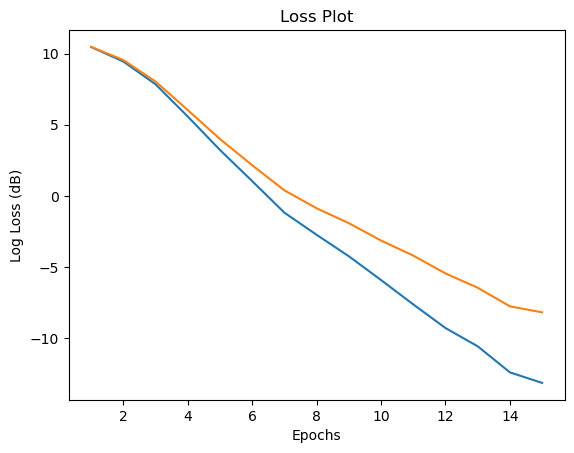

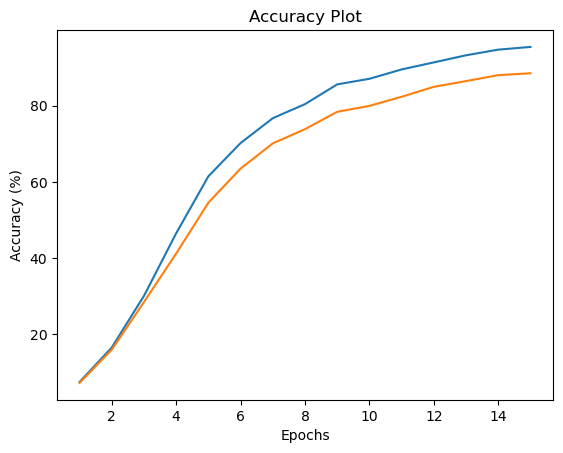

In [6]:
plot.plot_metrics(train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list)

## 2) Testing Phase

### i) Test Accuracy

In [7]:
test_accuracy, y_true, y_pred = evaluate.evaluate_model(model, test_loader, device)

Test Accuracy = 87.7778%
F1 Score = 0.8775
Recall = 0.8778
Precision = 0.8837


### ii) Confusion Matrix

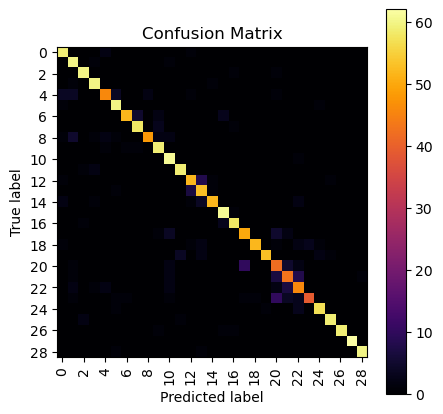

In [8]:
evaluate.conf_matrix(dataset, y_true, y_pred)